In [1]:
%matplotlib qt

2023-10-13 14:26:09.203 Python[67690:5568101] WARNING: Secure coding is not enabled for restorable state! Enable secure coding by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState: and returning YES.


In [13]:
import matplotlib as mpl
import happi
import numpy as np
import matplotlib.pyplot as plt

jetcmap = plt.cm.get_cmap("jet", 9) #generate a jet map with 10 values "rainbow", "jet", YlOrRd
jet_vals = jetcmap(np.arange(9)) #extract those values as an array 
jet_vals[0] = [1.0, 1, 1.0, 1] #change the first value 
jet_vals[8] = [0.0, 0, 0.0, 1] #change the first value 
newcmap = mpl.colors.LinearSegmentedColormap.from_list("mine", jet_vals) 

/var/folders/2t/97rc3fl92tg15k2l_4sk5hsh0000gn/T/ipykernel_67690/616493249.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jetcmap = plt.cm.get_cmap("jet", 9) #generate a jet map with 10 values "rainbow", "jet", YlOrRd


In [14]:
wkdir = [
    # '/Users/yao/Desktop/Data/F1_Al6um_t00/'
    # '/Users/yao/Desktop/Data/F1_Al6um_t01/',
    '/Users/yao/Desktop/Data/F1_Al6um_t02/'
    ]

In [15]:
S0 = happi.Open(wkdir[0], reference_angular_frequency_SI = 2.*np.pi*3e8/1.058e-6)
# S1 = happi.Open(wkdir[1], reference_angular_frequency_SI = 2.*np.pi*3e8/1.058e-6)

a_0 =  76.88190033966362
Loaded simulation '/Users/yao/Desktop/Data/F1_Al6um_t02/'
Scanning for Scalar diagnostics
Scanning for Field diagnostics
Scanning for Probe diagnostics
Scanning for ParticleBinning diagnostics
Scanning for RadiationSpectrum diagnostics
Scanning for Performance diagnostics
Scanning for Screen diagnostics
Scanning for Tracked particle diagnostics


In [16]:
# energy spectrum from screen vs. experimental data

plt.rc('font', family='sans-serif', serif='Arial')
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=8)
plt.rc('legend', fontsize=8)

width  = 3.487
height = width / 1.618 * 1.5



yrange1 = [23.5*S0.namelist.l0, 40*S0.namelist.l0]   # 22.76
fitting_factor1 = 5e11 * 4
ene1 = S0.Screen(2, units=['um','fs','MeV'],sum={'y':yrange1},).getData()

yrange2 = [20*S0.namelist.l0, 40*S0.namelist.l0]   # 22.76
fitting_factor2 = 5e10 * 5
ene2 = S0.Screen(2, units=['um','fs','MeV'],sum={'y':yrange2},).getData()

yrange3 = [0*S0.namelist.l0, 40*S0.namelist.l0]   # 22.76
fitting_factor3 = 5e10 * 80 #5e10 * 50
ene3 = S0.Screen(2, units=['um','fs','MeV'],sum={'y':yrange3},).getData()

xx  = S0.Screen(2, units=['um','fs','MeV']).getAxis('ekin')
tt  = S0.Screen(2, units=['um','fs','MeV']).getTimes()



fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)


# ax.semilogy(xx,ene1[-1]*fitting_factor1, color='black',
#              linestyle='--',
#              # label='PIC at t = {:.1f} fs'.format(tt[-1]),
#             label=r'PIC: [23.5, 40]',
#            )

# ax.semilogy(xx,ene2[-1]*fitting_factor2, color='m',
#              linestyle='-.',
#              # label='PIC at t = {:.1f} fs'.format(tt[-1]),
#             label=r'PIC: [20.0, 40]',
#            )

ax.semilogy(xx,ene3[-1]*fitting_factor3, color='k',lw=2.0,
             linestyle='--',
             # label='PIC at t = {:.1f} fs'.format(tt[-1]),
            label=r'PIC',
           )
# plt.semilogy(xx,ene[ts[1]]*fitting_factor, color='black',
#              label='2D PIC at t = '+str(round(tt[ts[1]]))+' fs')

ax.set_xlim([0,120])
ax.set_ylim([1e6,1e10])
# plt.title('time = '+str(tt[ts])+' fs')
ax.grid(which='both',linestyle='--',alpha=0.5)
ax.set_xlabel('Energy (MeV)')
ax.set_ylabel('fitted dN/dE')

## with DPM - 200 nm Si + 50 nm Al
#shot 115
# exp_energy = np.array([4.47, 7.42, 9.55, 11.92, 13.71, 15.12])
# exp_number = np.array([2.263e9, 1.185e9, 5.523e8, 1.790e8, 5.399e7, 3.149e7])

#shot 56
exp_energy_56  = np.array([4.9,    8.0,    10.3,   13.0,   15.1,   17.1,   19.5,   21.5,   23.4,   25.0,   26.5,   28.1,   29.5,   30.9]) 
exp_number_56  = np.array([2.71e9, 2.29e9, 1.30e9, 8.10e8, 6.20e8, 2.78e8, 2.53e8, 1.10e8, 7.93e7, 5.87e7, 3.91e7, 1.96e7, 1.25e7, 1.01e7]) 

#shot 111
exp_energy_111 = np.array([4.49, 7.74, 10.01, 12.67, 14.87, 16.88, 19.33, 21.47, 23.42, 25.23, 26.90, 28.75, 30.37, 32.03, 33.67, 35.17])
exp_number_111 = np.array([4.333e9, 4.103e9, 2.892e9, 1.386e9, 1.074e9, 4.606e8, 2.639e8, 1.605e8, 9.902e7, 7.454e7, 4.993e7, 2.849e7, 2.184e7, 1.170e7, 5.565e6, 5.165e6])

#shot 112
exp_energy_112 = np.array([4.76,    7.83,    10.10,   12.76,   14.95,   16.94,   19.34,   21.41,   23.26,   24.95,   26.48,   28.14,   29.57,   30.95])
exp_number_112 = np.array([3.252e9, 2.844e9, 1.888e9, 1.286e9, 8.366e8, 3.199e8, 2.005e8, 1.081e8, 6.068e7, 3.840e7, 3.108e7, 1.871e7, 1.021e7, 1.428e7])

#shot 216
exp_energy_216  = np.array([4.54,    7.53,    9.73,  12.27,   14.3,  16.05,  17.99,  19.48]) 
exp_number_216  = np.array([2.25e9, 1.36e9, 7.65e8, 2.76e8, 1.01e8, 5.01e7, 1.74e7, 1.20e7]) 

## w/o DPM - 1.5 um Al
#shot 193
exp_energy_193  = np.array([4.71,    7.76,   10.01,  12.64,  14.78,  16.70,  18.97,  20.89,  22.55,  24.00,  25.25]) 
exp_number_193  = np.array([6.79e9, 4.92e9, 2.51e9, 1.39e9, 4.73e8, 3.53e8, 9.26e7, 5.53e7, 4.00e7, 2.91e7, 2.15e7]) 

#shot 194
exp_energy_194  = np.array([4.83,    7.90,   10.16,  12.79,  14.92,  16.82,  19.07,  20.95,  22.58,  24.01,  25.25]) 
exp_number_194  = np.array([5.78e9, 4.54e9, 1.63e9, 9.77e8, 6.50e8, 4.35e8, 2.09e8, 7.92e7, 5.43e7, 4.37e7, 3.35e7]) 


# ax.scatter(exp_energy_56, exp_number_56, color='green', marker='s',
#             s=24,
#             label='Exp. 56')
# ax.scatter(exp_energy_111, exp_number_111, color='red', marker='o',
#             s=24,
#             label='Exp. 111')
# ax.scatter(exp_energy_112, exp_number_112, color='blue', marker='*',
#             s=24,
#             label='Exp. 112')
# ax.scatter(exp_energy_216, exp_number_216, color='c', marker='d',
#             s=24,
#             label='Exp. 216')

ax.scatter(exp_energy_193, exp_number_193, color='red', marker='o',
            s=24,
            label='Exp. 193')

ax.scatter(exp_energy_194, exp_number_194, color='green', marker='s',
            s=24,
            label='Exp. 194')


ax.legend()
fig.set_size_inches(width, height)
fig.tight_layout()

# plt.show()

In [33]:
fig.savefig('/Users/yao/Desktop/spectrum_50.pdf')

In [6]:
ene1 = np.array(S0.Screen(2, units=['um','fs','MeV']).getData()[-1]) # last timestep
yy = np.array(S0.Screen(2, units=['um','fs','MeV']).getAxis('y'))
ee = np.array(S0.Screen(2, units=['um','fs','MeV']).getAxis('ekin'))

In [7]:
plt.rc('font', family='sans-serif', serif='Arial')
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=8)
plt.rc('legend', fontsize=8)

from mpl_toolkits.axes_grid1 import make_axes_locatable


width  = 3.487
height = width / 1.618 * 1.2

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)

yekin = ax.imshow(np.log10(ene1.T),
           cmap=newcmap,
           origin='lower',
           extent=[ee[0],ee[-1],yy[0],yy[-1]],
           vmin=-4,
           vmax=-2,
           aspect='equal',
          )
cbar = fig.colorbar(yekin, cax=cax)
cbar.minorticks_on()
ax.set_xlim(2,36)
ax.set_ylim(5,35)
ax.set_xlabel('ekin (MeV)')
ax.set_ylabel('y (um)')
ax.grid(linestyle='--',color='grey',alpha=0.5)
fig.set_size_inches(width, height)
fig.tight_layout()

/var/folders/2t/97rc3fl92tg15k2l_4sk5hsh0000gn/T/ipykernel_3184/4026294312.py:19: RuntimeWarning: divide by zero encountered in log10
  yekin = ax.imshow(np.log10(ene1.T),


In [36]:
fig.savefig('/Users/yao/Desktop/yekin.pdf')

In [49]:
angene1 = np.array(S0.Screen(6, units=['um','fs','MeV']).getData()[-1]) # last timestep
ang = np.array(S0.Screen(6, units=['um','fs','MeV']).getAxis('user_function0'))
ee = np.array(S0.Screen(6, units=['um','fs','MeV']).getAxis('ekin'))

In [51]:
plt.rc('font', family='sans-serif', serif='Arial')
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=8)
plt.rc('legend', fontsize=8)

from mpl_toolkits.axes_grid1 import make_axes_locatable


width  = 3.487
height = width / 1.618 * 1.2

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)

yekin = ax.imshow(np.log10(angene1.T),
           cmap=newcmap,
           origin='lower',
           extent=[ang[0],ang[-1],ee[0],ee[-1]],
           vmin=-7,
           vmax=-3,
           aspect='equal',
          )
cbar = fig.colorbar(yekin, cax=cax)
cbar.minorticks_on()
ax.set_xlim(-20,20)
ax.set_ylim(2,36)
ax.set_xlabel(r'angle ($\degree$)')
ax.set_ylabel('ekin (MeV)')
ax.grid(linestyle='--',color='grey',alpha=0.5)
fig.set_size_inches(width, height)
fig.tight_layout()

/var/folders/2t/97rc3fl92tg15k2l_4sk5hsh0000gn/T/ipykernel_31255/3712685788.py:19: RuntimeWarning: divide by zero encountered in log10
  yekin = ax.imshow(np.log10(angene1.T),


In [52]:
fig.savefig('/Users/yao/Desktop/ang_ene_p.pdf')

In [53]:
angene1 = np.array(S0.Screen(7, units=['um','fs','MeV']).getData()[-1]) # last timestep
ang = np.array(S0.Screen(7, units=['um','fs','MeV']).getAxis('user_function0'))
ee = np.array(S0.Screen(7, units=['um','fs','MeV']).getAxis('ekin'))

In [54]:
plt.rc('font', family='sans-serif', serif='Arial')
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=8)
plt.rc('legend', fontsize=8)

from mpl_toolkits.axes_grid1 import make_axes_locatable


width  = 3.487
height = width / 1.618 * 1.2

fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)

yekin = ax.imshow(np.log10(angene1.T),
           cmap=newcmap,
           origin='lower',
           extent=[ang[0],ang[-1],ee[0],ee[-1]],
           vmin=-7,
           vmax=-3,
           aspect='auto',
          )
cbar = fig.colorbar(yekin, cax=cax)
cbar.minorticks_on()
ax.set_xlim(-90,90)
ax.set_xticks([-90, -45, 0, 45, 90])
ax.set_ylim(0,16)
ax.set_xlabel(r'angle ($\degree$)')
ax.set_ylabel('ekin (MeV)')
ax.grid(linestyle='--',color='grey',alpha=0.5)
fig.set_size_inches(width, height)
fig.tight_layout()

/var/folders/2t/97rc3fl92tg15k2l_4sk5hsh0000gn/T/ipykernel_31255/3828763420.py:19: RuntimeWarning: divide by zero encountered in log10
  yekin = ax.imshow(np.log10(angene1.T),


In [55]:
fig.savefig('/Users/yao/Desktop/ang_ene_e.pdf')

In [113]:
xx[660]

9.582961367237239

In [117]:
from lmfit import Model, Parameters, report_fit

def temp(xdata, A, kT):
    return np.exp(-xdata/kT)*A
    
start_point = 500  # 3 MeV 
end_point = 660    # 25 MeV
fitmethod =  'leastsq' #'leastsq' #'tnc' 'cg' 'differential_evolution'

def fitting(case, start, end):
    gmod = Model(temp)
    gmod.set_param_hint('kT', value=1.8, vary=True, min=1.0e-2, max=1.0e1)
    gmod.set_param_hint('A', value=3.0, vary=True, min=1.0e-5, max=1.0e5)
    pars = gmod.make_params()
    result = gmod.fit(case[start:end], xdata=xx[start:end], method=fitmethod, nan_policy='omit')
    print(result.fit_report())
    print("kT: ", result.values['kT'])
    print("Reduced chi square: ", result.redchi)
    return result.best_fit, result.values['kT'], result.redchi

y, kT, redchi = fitting(ene3[-1], start_point, end_point)

[[Model]]
    Model(temp)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 37
    # data points      = 160
    # variables        = 2
    chi-square         = 5.4176e-09
    reduced chi-square = 3.4288e-11
    Akaike info crit   = -3853.40644
    Bayesian info crit = -3847.25610
    R-squared          = 0.97430149
[[Variables]]
    A:   7.5708e-04 +/- 2.9353e-05 (3.88%) (init = 3)
    kT:  1.80377233 +/- 0.03309898 (1.83%) (init = 1.8)
[[Correlations]] (unreported correlations are < 0.100)
    C(A, kT) = -0.9816
kT:  1.80377233394313
Reduced chi square:  3.428848653940854e-11


In [121]:
# eon energy spectrum from screen -- check the electron temperature and thus X-rays

plt.rc('font', family='sans-serif', serif='Arial')
plt.rc('text', usetex=False)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=8)
plt.rc('legend', fontsize=8)

# plt.rc('text', usetex=False)
# mpl.rcParams['font.family'] = 'Arial'
# mpl.rcParams['axes.labelsize'] = 12
# mpl.rcParams['legend.fontsize'] = 16
# mpl.rcParams['xtick.labelsize'] = 12
# mpl.rcParams['ytick.labelsize'] = 12
# mpl.rcParams['lines.linewidth'] = 2

width  = 3.487
height = width / 1.618 * 1.5

# yrange3 = [0*S0.namelist.l0, 40*S0.namelist.l0]   # 22.76
# fitting_factor3 = 5e10 * 50
ene3 = S0.Screen(3, units=['um','fs','MeV'],
                 # data_log=True,
                 # ,sum={'y':yrange3},
                ).getData()

xx  = S0.Screen(3, units=['um','fs','MeV']).getAxis('ekin')
tt  = S0.Screen(3, units=['um','fs','MeV']).getTimes()

# index = (xx < 30.0)*(xx > 3.0)
# x2 = xx[index]
# y2 = func(x2,0.02,5)




fig, ax = plt.subplots()
fig.subplots_adjust(left=.15, bottom=.16, right=.99, top=.97)

ax.semilogy(xx,ene3[-1], color='k',lw=1.0,
             linestyle='-',
             # label='PIC at t = {:.1f} fs'.format(tt[-1]),
            label=r'eon',
           )

ax.semilogy(xx[start_point:end_point], y, '--r', linewidth=2.0, markersize=6, mfc='none',mew=1, label='{:.1f} MeV (R.C.={:.1e})'.format(kT, redchi))


ax.set_xlim([0.1,10])
ax.set_ylim([1e-6,1e-1])
# plt.title('time = '+str(tt[ts])+' fs')
# ax.grid(which='both',linestyle='--',alpha=0.5)
ax.set_xlabel('Energy (MeV)')
ax.set_ylabel('dN/dE (No./MeV)')

ax.legend()
fig.set_size_inches(width, height)
fig.tight_layout()

# plt.show()

In [122]:
fig.savefig('/Users/yao/Desktop/spec_e_temp.pdf')

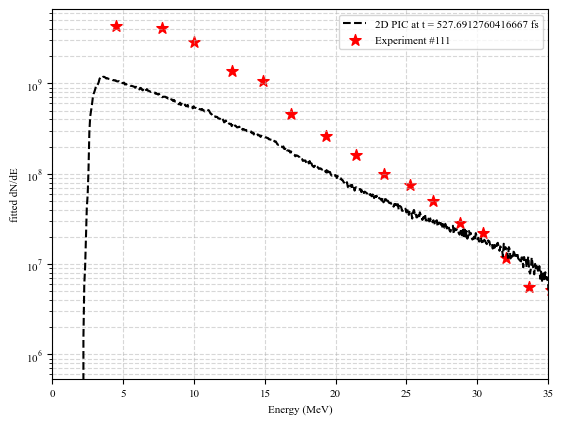

In [110]:
# energy spectrum from screen vs. experimental data

ene = S0.Screen(0, units=['um','fs','MeV']).getData()
xx  = S0.Screen(0, units=['um','fs','MeV']).getAxis('ekin')
tt  = S0.Screen(0, units=['um','fs','MeV']).getTimes()

fitting_factor = 9e11

plt.semilogy(xx,ene[-1]*fitting_factor, color='black',
             linestyle='--',
             label='2D PIC at t = '+str(tt[-1])+' fs')
# plt.semilogy(xx,ene[ts[1]]*fitting_factor, color='black',
#              label='2D PIC at t = '+str(round(tt[ts[1]]))+' fs')

plt.xlim([0,35])
# plt.ylim([1e-7,1])
# plt.title('time = '+str(tt[ts])+' fs')
plt.grid(which='both',linestyle='--',alpha=0.5)
plt.xlabel('Energy (MeV)')
plt.ylabel('fitted dN/dE')

#shot 115
# exp_energy = np.array([4.47, 7.42, 9.55, 11.92, 13.71, 15.12])
# exp_number = np.array([2.263e9, 1.185e9, 5.523e8, 1.790e8, 5.399e7, 3.149e7])

#shot 111
exp_energy = np.array([4.49, 7.74, 10.01, 12.67, 14.87, 16.88, 19.33, 21.47, 23.42, 25.23, 26.90, 28.75, 30.37, 32.03, 33.67, 35.17])
exp_number = np.array([4.333e9, 4.103e9, 2.892e9, 1.386e9, 1.074e9, 4.606e8, 2.639e8, 1.605e8, 9.902e7, 7.454e7, 4.993e7, 2.849e7, 2.184e7, 1.170e7, 5.565e6, 5.165e6])
plt.scatter(exp_energy, exp_number, color='red', marker='*',
            s=72,
            label='Experiment #111')
plt.legend()

plt.show()

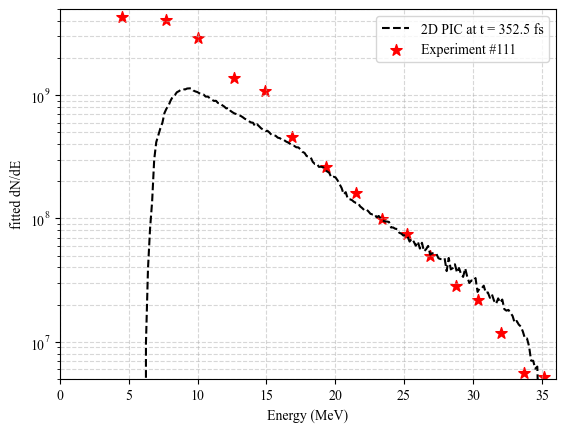

In [37]:
fig.savefig('/Users/yao/Desktop/spectrum.png',dpi=600)

NameError: name 'fig' is not defined

In [8]:
# energy spectrum from Particle Bin vs. experimental data

ene = np.array(S0.ParticleBinning(3, units=['um','fs','MeV']).getData())
xx  = np.array(S0.ParticleBinning(3, units=['um','fs','MeV']).getAxis('ekin'))
tt  = np.array(S0.ParticleBinning(3, units=['um','fs','MeV']).getTimes())

fitting_factor = 9e11
timestep = -1 #93

plt.semilogy(xx,ene[timestep]*fitting_factor, color='black',
             linestyle='--',
             label='2D PIC at t = '+str(tt[-1])+' fs')
# plt.semilogy(xx,ene[ts[1]]*fitting_factor, color='black',
#              label='2D PIC at t = '+str(round(tt[ts[1]]))+' fs')

# plt.xlim([0,40])
# plt.ylim([1e-7,1])
# plt.title('time = '+str(tt[ts])+' fs')
plt.grid(which='both',linestyle='--',alpha=0.5)
plt.xlabel('Energy (MeV)')
plt.ylabel('fitted dN/dE')

#shot 115
# exp_energy = np.array([4.47, 7.42, 9.55, 11.92, 13.71, 15.12])
# exp_number = np.array([2.263e9, 1.185e9, 5.523e8, 1.790e8, 5.399e7, 3.149e7])

#shot 111
exp_energy = np.array([4.49, 7.74, 10.01, 12.67, 14.87, 16.88, 19.33, 21.47, 23.42, 25.23, 26.90, 28.75, 30.37, 32.03, 33.67, 35.17])
exp_number = np.array([4.333e9, 4.103e9, 2.892e9, 1.386e9, 1.074e9, 4.606e8, 2.639e8, 1.605e8, 9.902e7, 7.454e7, 4.993e7, 2.849e7, 2.184e7, 1.170e7, 5.565e6, 5.165e6])
plt.scatter(exp_energy, exp_number, color='red', marker='*',
            s=72,
            label='Experiment #111')
plt.legend()

plt.show()

In [ ]:
ene = np.array(ene)

In [ ]:
tt[93]

In [7]:
#%% energy spectrum of H from screen 

xmin0 = 2
xmax0 = 20.0
vmin0 = -6
vmax0 = -3

ene10 = S0.Screen(0, units=['um','fs','MeV'],
                  data_log=True,
                  label="10 nm",
                  color='red',
                  linestyle='-',
                    # vmin=vmin0,
                   # vmax=vmax0,
                   # xmin=xmin0,
                   # xmax=xmax0,
                  ).slide()


#0 - Number density of species # 3
    ekin from 0.391389 to 117.417 in 1000 steps 

The value in each bin is the sum of the `deposited_quantity` divided by the bin size and by grid_length[0] * grid_length[1]



In [6]:
#%% px-py distribution for H from screen

vmin0 = -8
vmax0 = 0
xmin0 = -20
xmax0 = 20
ymin0 = -20
ymax0 = 20

ene10 = S0.Screen(1, units=['um','fs','MeV'],
                  data_log=True,
                  cmap=newcmap,
                  # label="10 nm",
                  # color='red',
                  # linestyle='-',
                  vmin=vmin0,
                  vmax=vmax0,
                  # xmin=xmin0,
                  # xmax=xmax0,
                  # ymin=ymin0,
                  # ymax=ymax0,
                  ).slide()


#1 - Number density of species # 2
    px from 0 to 600 in 300 steps 
    py from -200 to 200 in 200 steps 

The value in each bin is the sum of the `deposited_quantity` divided by the bin size and by grid_length[0] * grid_length[1]



In [8]:
#%% energy spectrum of H from screen with resolution in y
# %matplotlib widget
xmin0 = 2
xmax0 = 36
vmin0 = -4
vmax0 = -2
ymin0 = 5
ymax0 = 35

ene10 = S0.Screen(2, units=['um','fs','MeV'],
                  data_log=True,
                  cmap=newcmap,
                  label="10 nm",
                  color='red',
                  linestyle='-',
                  # sum={'y':'all'},
                    vmin=vmin0,
                   vmax=vmax0,
                   xmin=xmin0,
                   xmax=xmax0,
                  ymin=ymin0,
                   ymax=ymax0,
                  ).slide()


#2 - Number density of species # 3
    ekin from 0.391389 to 117.417 in 400 steps 
    y from 25.1327 to 226.195 in 200 steps 

The value in each bin is the sum of the `deposited_quantity` divided by the bin size and by grid_length[0]



In [7]:
#%% energy spectrum of eon from screen to the right
xmin0 = 2
xmax0 = 20.0
vmin0 = -6
vmax0 = -3

ene10 = S0.Screen(3, units=['um','fs','MeV'],
                  data_log=True,
                  label="10 nm",
                  color='red',
                  linestyle='-',
                    # vmin=vmin0,
                   # vmax=vmax0,
                   # xmin=xmin0,
                   # xmax=xmax0,
                  ).slide()

Cannot format x ticks (typically happens with log-scale)

#3 - Number density of species # 0
    ekin from 0.195695 to 195.695 in 1000 steps  [ LOG SCALE ] 

The value in each bin is the sum of the `deposited_quantity` divided by the bin size and by grid_length[0] * grid_length[1]



In [9]:
#%% energy spectrum of eon from screen to the left

xmin0 = 2
xmax0 = 20.0
vmin0 = -6
vmax0 = -3

ene10 = S0.Screen(4, units=['um','fs','MeV'],
                  data_log=True,
                  label="10 nm",
                  color='red',
                  linestyle='-',
                    # vmin=vmin0,
                   # vmax=vmax0,
                   # xmin=xmin0,
                   # xmax=xmax0,
                  ).slide()

Cannot format x ticks (typically happens with log-scale)

#4 - Number density of species # 0,1
    ekin from 0.195695 to 195.695 in 1000 steps  [ LOG SCALE ] 

The value in each bin is the sum of the `deposited_quantity` divided by the bin size and by grid_length[0] * grid_length[1]



In [10]:
#%% px-py distribution for eon
%matplotlib widget
vmin0 = -8
vmax0 = 0
xmin0 = -20
xmax0 = 20
ymin0 = -20
ymax0 = 20

ene10 = S0.Screen(5, units=['um','fs','MeV'],
                  data_log=True,
                  cmap=newcmap,
                  # label="10 nm",
                  # color='red',
                  # linestyle='-',
                  vmin=vmin0,
                  vmax=vmax0,
                  # xmin=xmin0,
                  # xmax=xmax0,
                  # ymin=ymin0,
                  # ymax=ymax0,
                  ).slide()


#5 - Number density of species # 0,1
    px from 0 to 100 in 200 steps 
    py from -50 to 50 in 200 steps 

The value in each bin is the sum of the `deposited_quantity` divided by the bin size and by grid_length[0] * grid_length[1]



In [11]:
#%% angular vs. energy distribution for H from screen

vmin0 = -7
vmax0 = -3
xmin0 = -20
xmax0 = 20
ymin0 = 2
ymax0 = 36

ene10 = S0.Screen(6, units=['um','fs','MeV'],
                  data_log=True,
                  cmap=newcmap,
                  # label="10 nm",
                  # color='red',
                  # linestyle='-',
                  vmin=vmin0,
                  vmax=vmax0,
                  xmin=xmin0,
                  xmax=xmax0,
                  ymin=ymin0,
                  ymax=ymax0,
                  ).plot()


#6 - Number density of species # 3
    user_function0 from -50 to 50 in 200 steps 
    ekin from 0 to 97.8474 in 200 steps 

The value in each bin is the sum of the `deposited_quantity` divided by the bin size and by grid_length[0] * grid_length[1]




#7 - Number density of species # 0
    user_function0 from -90 to 90 in 200 steps 
    ekin from 0 to 97.8474 in 200 steps 

The value in each bin is the sum of the `deposited_quantity` divided by the bin size and by grid_length[0] * grid_length[1]



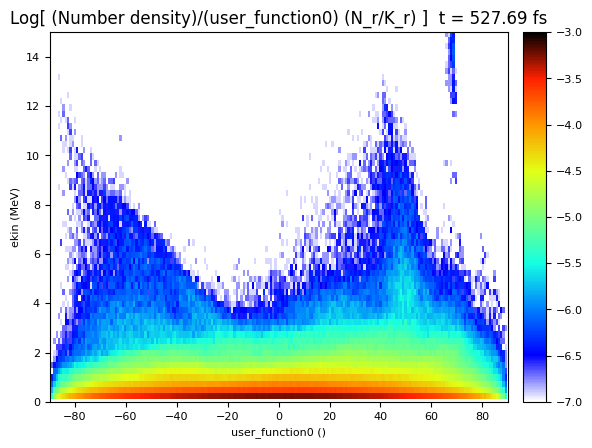

In [219]:
#%% angular vs. energy distribution for eon from screen

vmin0 = -7
vmax0 = -3
xmin0 = -90
xmax0 = 90
ymin0 = 0
ymax0 = 15

ene10 = S0.Screen(7, units=['um','fs','MeV'],
                  data_log=True,
                  cmap=newcmap,
                  # label="10 nm",
                  # color='red',
                  # linestyle='-',
                  vmin=vmin0,
                  vmax=vmax0,
                  xmin=xmin0,
                  xmax=xmax0,
                  ymin=ymin0,
                  ymax=ymax0,
                  ).plot()

In [12]:
#%% x-px distribution for H

vmin0 = -6
vmax0 = 0
xmin0 = -20
xmax0 = 20
ymin0 = -20
ymax0 = 20

ene10 = S0.ParticleBinning(0, units=['um','fs','MeV'],
                  data_log=True,
                  cmap=newcmap,
                  # label="10 nm",
                  # color='red',
                  # linestyle='-',
                  vmin=vmin0,
                  vmax=vmax0,
                  # xmin=xmin0,
                  # xmax=xmax0,
                  # ymin=ymin0,
                  # ymax=ymax0,
                  ).slide()


#0 - Number density of species # 3
    x from 0 to 125.664 in 200 steps 
    px from -200 to 600 in 400 steps 

The value in each bin is the sum of the `deposited_quantity` divided by the bin size and by grid_length[1]



In [13]:
#%% density distribution for H
%matplotlib widget
vmin0 = 18
vmax0 = 23
xmin0 = -20
xmax0 = 20
ymin0 = -20
ymax0 = 20

ene10 = S0.ParticleBinning(1, units=['um','fs','MeV','cm^-3'],
                  data_log=True,
                  cmap=newcmap,
                           aspect='equal',
                  # label="10 nm",
                  # color='red',
                  # linestyle='-',
                  vmin=vmin0,
                  vmax=vmax0,
                  # xmin=xmin0,
                  # xmax=xmax0,
                  # ymin=ymin0,
                  # ymax=ymax0,
                  ).slide()


#1 - Number density of species # 3
    x from 62.8319 to 125.664 in 100 steps 
    y from 0 to 251.327 in 400 steps 

The value in each bin is the sum of the `deposited_quantity` divided by the bin size



In [14]:
#%% px-py distribution for H

vmin0 = -8
vmax0 = 0
xmin0 = -20
xmax0 = 20
ymin0 = -20
ymax0 = 20

ene10 = S0.ParticleBinning(2, units=['um','fs','MeV'],
                  data_log=True,
                  cmap=newcmap,
                  # label="10 nm",
                  # color='red',
                  # linestyle='-',
                  vmin=vmin0,
                  vmax=vmax0,
                  # xmin=xmin0,
                  # xmax=xmax0,
                  # ymin=ymin0,
                  # ymax=ymax0,
                  ).slide()


#2 - Number density of species # 3
    px from 0 to 800 in 400 steps 
    py from -200 to 200 in 200 steps 

The value in each bin is the sum of the `deposited_quantity` divided by the bin size and by grid_length[0] * grid_length[1]



In [11]:
#%% energy spectrum of H from Particle Bin 

xmin0 = 2
xmax0 = 20.0
vmin0 = -6
vmax0 = -3

ene10 = S0.ParticleBinning(3, units=['um','fs','MeV'],
                  data_log=True,
                  label="10 nm",
                  color='red',
                  linestyle='-',
                    # vmin=vmin0,
                   # vmax=vmax0,
                   # xmin=xmin0,
                   # xmax=xmax0,
                  ).slide()


#3 - Number density of species # 3
    ekin from 0.000391389 to 117.417 in 1000 steps 

The value in each bin is the sum of the `deposited_quantity` divided by the bin size and by grid_length[0] * grid_length[1]



In [15]:
#%% x-px distribution for eon
%matplotlib widget
vmin0 = -8
vmax0 = 0
xmin0 = -20
xmax0 = 20
ymin0 = -20
ymax0 = 20

ene10 = S0.ParticleBinning(4, units=['um','fs','MeV'],
                  data_log=True,
                  cmap=newcmap,
                  # label="10 nm",
                  # color='red',
                  # linestyle='-',
                  vmin=vmin0,
                  vmax=vmax0,
                  # xmin=xmin0,
                  # xmax=xmax0,
                  # ymin=ymin0,
                  # ymax=ymax0,
                  ).slide()


#4 - Number density of species # 0,1
    x from 0 to 125.664 in 200 steps 
    px from -50 to 50 in 200 steps 

The value in each bin is the sum of the `deposited_quantity` divided by the bin size and by grid_length[1]



In [16]:
#%% density distribution for eon

vmin0 = 17
vmax0 = 23
xmin0 = -20
xmax0 = 20
ymin0 = -20
ymax0 = 20

ene10 = S0.ParticleBinning(5, units=['um','fs','MeV','cm^-3'],
                  data_log=True,
                  cmap=newcmap,
                           aspect='equal',
                  # label="10 nm",
                  # color='red',
                  # linestyle='-',
                  vmin=vmin0,
                  vmax=vmax0,
                  # xmin=xmin0,
                  # xmax=xmax0,
                  # ymin=ymin0,
                  # ymax=ymax0,
                  ).slide()


#5 - Number density of species # 0,1
    x from 0 to 125.664 in 200 steps 
    y from 0 to 251.327 in 200 steps 

The value in each bin is the sum of the `deposited_quantity` divided by the bin size



In [ ]:
#%% px-py distribution for eon
%matplotlib widget
vmin0 = -8
vmax0 = 0
xmin0 = -20
xmax0 = 20
ymin0 = -20
ymax0 = 20

ene10 = S0.ParticleBinning(6, units=['um','fs','MeV'],
                  data_log=True,
                  cmap=newcmap,
                  # label="10 nm",
                  # color='red',
                  # linestyle='-',
                  vmin=vmin0,
                  vmax=vmax0,
                  # xmin=xmin0,
                  # xmax=xmax0,
                  # ymin=ymin0,
                  # ymax=ymax0,
                  ).slide()

In [12]:
#%% energy spectrum of eon from Particle Bin 

xmin0 = 2
xmax0 = 20.0
vmin0 = -6
vmax0 = -3

ene10 = S0.ParticleBinning(7, units=['um','fs','MeV'],
                  data_log=True,
                  label="10 nm",
                  color='red',
                  linestyle='-',
                    # vmin=vmin0,
                   # vmax=vmax0,
                   # xmin=xmin0,
                   # xmax=xmax0,
                  ).slide()

Cannot format x ticks (typically happens with log-scale)

#7 - Number density of species # 0
    ekin from 0.195695 to 195.695 in 1000 steps  [ LOG SCALE ] 

The value in each bin is the sum of the `deposited_quantity` divided by the bin size and by grid_length[0] * grid_length[1]



In [ ]:
#%% angular vs. energy distribution for H
%matplotlib widget
vmin0 = -8
vmax0 = 0
xmin0 = -20
xmax0 = 20
ymin0 = -20
ymax0 = 20

ene10 = S0.ParticleBinning(8, units=['um','fs','MeV'],
                  data_log=True,
                  cmap=newcmap,
                  # label="10 nm",
                  # color='red',
                  # linestyle='-',
                  vmin=vmin0,
                  vmax=vmax0,
                  # xmin=xmin0,
                  # xmax=xmax0,
                  # ymin=ymin0,
                  # ymax=ymax0,
                  ).slide()

In [ ]:
#%% angular vs. energy distribution for eon
%matplotlib widget
vmin0 = -8
vmax0 = 0
xmin0 = -20
xmax0 = 20
ymin0 = -20
ymax0 = 20

ene10 = S0.ParticleBinning(9, units=['um','fs','MeV'],
                  data_log=True,
                  cmap=newcmap,
                  # label="10 nm",
                  # color='red',
                  # linestyle='-',
                  vmin=vmin0,
                  vmax=vmax0,
                  # xmin=xmin0,
                  # xmax=xmax0,
                  # ymin=ymin0,
                  # ymax=ymax0,
                  ).slide()

In [ ]:
#%% xy vs. energy distribution for eon
%matplotlib widget
vmin0 = 18
vmax0 = 23
xmin0 = -20
xmax0 = 20
ymin0 = -20
ymax0 = 20

ene10 = S0.ParticleBinning(10, units=['um','fs','MeV','cm^-3 MeV'],
                  data_log=True,
                  cmap=newcmap,
                  # label="10 nm",
                  # color='red',
                  # linestyle='-',
                           sum={'ekin':[0.1/0.511]},
                  vmin=vmin0,
                  vmax=vmax0,
                  # xmin=xmin0,
                  # xmax=xmax0,
                  # ymin=ymin0,
                  # ymax=ymax0,
                  ).slide()

In [13]:

vsym0 = 1e12

Ey10 = S0.Field(1, 'Ex', units=['um','fs','V/m'],
                # vsym=True,
                vsym=vsym0,
                aspect='equal',
                ).slide()

Field diagnostic #1: Ex
	Time_average: 256.0 timesteps
	Grid spacing: 0.09817477042468103, 0.09817477042468103


In [13]:

vsym0 = 1e12

Ey10 = S0.Field(0, 'Ey', units=['um','fs','V/m'],
                # vsym=True,
                vsym=vsym0,
                aspect='equal',
                ).slide()

Field diagnostic #0: Ey
	Grid spacing: 0.09817477042468103, 0.09817477042468103


In [ ]:
qe = 1.6e-19
E  = 1e12
l  = 1e-6
ene = qe*E*l / qe /1e6
print('ene = {:.2e} MeV'.format(ene))

In [ ]:
np.arctan2(-1,1) * 180 / np.pi

In [5]:
# check the normalized laser intensity
import numpy as np
E = 45.0
tau = 22e-15 
d = 3.e-4
I = E / tau / (np.pi * (d/2)**2)
print(I)

2.893726238034461e+22


In [ ]:
I = 2e22 # W/cm2
lmd = 1.058 # um
a0 = 0.86*lmd*np.sqrt(I/1e18)

In [247]:
a0

128.67646361320317

In [252]:
a0 / np.pi / 100 * lmd

0.4333461193551197